Name: Smrutirekha Singhari
The Sparks Foundation: Graduate Rotational Internship Program
Date Science and Business Analytics Intern
TASK 1: Prediction using supervised machine learning (Linear Regression)
Problem Statement: Predict the percentage score of a student based on the number of study hours

Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

Importing the Dataset

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Exploratory Data Analysis

In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Plotting the distribution of Target Variable (Scores) and feature (Hours)

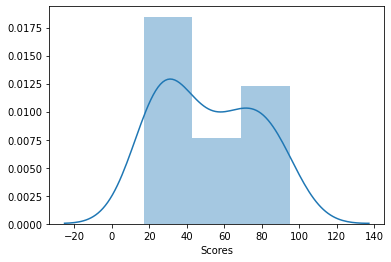

In [6]:
sns.distplot(data.Scores)
plt.savefig('histogram_score.png')

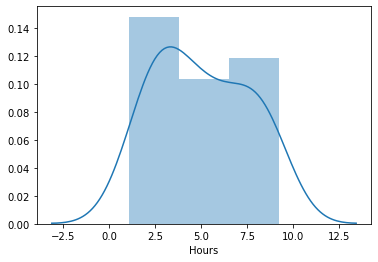

In [7]:
sns.distplot(data.Hours)
plt.savefig('histogram_hours.png')

Plotting the correlation between Target Variable (Scores) and feature (Hour)

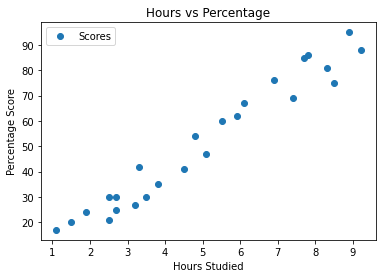

<Figure size 432x288 with 0 Axes>

In [8]:
# Plotting scatter plot of Score and Hours
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()
plt.savefig('scatterplot_hour_andscore.png')

In [9]:
#Calculating and plotting heatmap correlation
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Preparing  data for Analysis

Divide dataset into attributes (independent variable) and labels(dependent variable ) to X and y respectively

In [11]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Splitting the dataset: 80% for training and 20% for testing

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

Fitting regression model for training dataset

In [13]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


full sample regression results:Scatter plot with line of best fit

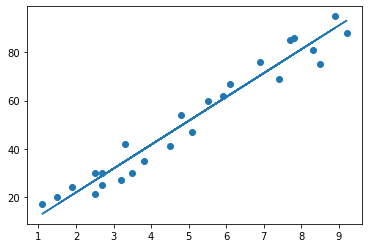

In [14]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Regression Result for full sample

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [16]:
lm1 = smf.ols('Scores ~ Hours', data=data).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           9.13e-17
Time:                        16:44:35   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Estimated Regression equation
Scores = 2.4837 + 9.7758 * Hours 

Using the Model for Prediction

Model prediction using Test data

In [20]:
print(X_test)                          # Testing data - In Hours
y_pred_test = regressor.predict(X_test)    # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Model prediction using Training data

In [22]:
print(X_train)                        
y_pred_train = regressor.predict(X_train) 

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


Model prediction using full sample data

In [23]:
print(X)                        
y_pred = regressor.predict(X) 

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


Predict the percentage score of a student based on the number of study hours

In [24]:
Hours = 9.25
h=np.array(Hours)
h=h.reshape(-1,1)
own_pred = regressor.predict(h)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


Model Evaluation using metrics

In [26]:
from sklearn import metrics  

Model evaluation using matrics for test data

In [29]:
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for testing set is {}'.format(MAE_test))
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for test set is {}'.format(MSE_test))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for testing set is 4.183859899002975
MSE for test set is 21.5987693072174
RMSE for test set is 4.6474476121003665


In [ ]:
Model evaluation using matrics for train data

In [37]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
print('MAE for training set is {}'.format(MAE_train))
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
print('MSE for training set is {}'.format(MSE_train))
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE for training set is {}'.format(RMSE_train))

MAE for training set is 5.186601709180368
MSE for training set is 30.89818237731452
RMSE for training set is 5.558613350226342


In [ ]:
Model evaluation using matrics for full sample data

In [31]:
MAE = metrics.mean_absolute_error(y, y_pred)
print('MAE for full sample data set is {}'.format(MAE))
MSE = metrics.mean_squared_error(y, y_pred)
print('MSE for full sample set is {}'.format(MSE))
RMSE = np.sqrt(metrics.mean_squared_error(y, y_pred))
print('RMSE for full sample set is {}'.format(RMSE))

MAE for full sample data set is 4.986053347144891
MSE for full sample set is 29.03829976329509
RMSE for full sample set is 5.388719677557471


Model Evaluation using Rsquared value

Rsquared and  adjusted_r_squared value for test data

In [35]:
yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.9454906892105356 0.9273209189473808


Rsquared and  adjusted_r_squared value for train data

In [34]:
yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.9515510725211552 0.9488594654389972


Rsquared and  adjusted_r_squared value for full sample data

In [36]:
yhat = regressor.predict(X)
SS_Residual = sum((y-yhat)**2)
SS_Total = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.9526947647057274 0.950638015345107


In [ ]:
Conclusion: This value of R square shows that it is  a good fit model.